For this project, we will import data from opendota.com, which is a website that collects data from dota2 matches.

In [19]:
### import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
### Allowing matplotlib to graph directly on jupyter
%matplotlib inline

In [20]:
### laod the dataset into a variable df
df = pd.read_csv(r'C:\Users\tnguy\OneDrive - Texas Tech University\Dota2 end to end machine learning\data\resultss.csv', encoding = 'utf8')
df.apply(lambda x: pd.lib.infer_dtype(x.values))

C:\Users\tnguy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (27,59,62,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


abandons                    integer
account_id                 floating
actions_per_min            floating
ancient_kills              floating
assists                     integer
backpack_0                 floating
backpack_1                 floating
backpack_2                 floating
buyback_count              floating
camps_stacked              floating
cluster                     integer
courier_kills              floating
creeps_stacked             floating
deaths                      integer
denies                      integer
duration                    integer
firstblood_claimed         floating
game_mode                   integer
gold                       floating
gold_per_min                integer
gold_spent                 floating
hero_damage                floating
hero_healing               floating
hero_id                     integer
hero_kills                 floating
isRadiant                   boolean
is_contributor              boolean
is_roaming                  

### Reading data

In [21]:
### Show the first five rows of the data table
df.head()

,abandons,account_id,actions_per_min,ancient_kills,assists,backpack_0,backpack_1,backpack_2,buyback_count,camps_stacked,...,start_time,stuns,teamfight_participation,total_gold,total_xp,tower_damage,tower_kills,towers_killed,win,xp_per_min
0,0,381798591.0,131.0,0.0,10,0.0,0.0,0.0,0.0,0.0,...,1527006038,26.178345,0.500000,22246,27965.0,4784.0,3.0,3.0,1,714
1,0,NaN,176.0,0.0,12,0.0,0.0,0.0,0.0,3.0,...,1527006038,0.000000,0.526316,16724,18721.0,1458.0,0.0,0.0,1,478
2,0,NaN,192.0,0.0,17,0.0,0.0,0.0,0.0,0.0,...,1527006038,43.595947,0.684211,13238,14961.0,381.0,0.0,0.0,1,382
3,0,110870904.0,150.0,0.0,17,0.0,0.0,0.0,0.0,0.0,...,1527006038,7.492188,0.578947,14530,20249.0,83.0,0.0,0.0,1,517
4,0,NaN,94.0,12.0,9,182.0,0.0,181.0,0.0,0.0,...,1527006038,0.000000,0.368421,23539,27886.0,7723.0,2.0,2.0,1,712


Just out of curiosity, I want to know how well I did in the 2947 matches I played. Below is my total number of wins and losses.

In [22]:
### get my match_details using my account_id
df_my_match = df[df['account_id'] == 120236951] 
df_my_match['win'].value_counts()

1    1479
0    1468
Name: win, dtype: int64

There are an equal number of 14735 for my losing and winning matches.Apparently, I have a 50.2% winning rate. It might look average, but for your information, I ended up in approximately the 95th percentile of all players in dota2. 

A correlation matrix gives an overview of the correlation between the features I want to study and the target feature (which is my wins). The results shows a positive correlation if they are close to 1 and negative correlation if they are close -1. Thus, let's compute a correlation matrix.

In [23]:
corr_matrix = df_my_match.corr()
corr_matrix['win'].sort_values(ascending = False)

win                    1.000000
gold                   0.566857
tower_damage           0.556291
gold_per_min           0.546683
kda                    0.490050
towers_killed          0.454402
xp_per_min             0.415524
kills_per_min          0.369223
tower_kills            0.363099
total_gold             0.344635
assists                0.325071
kills                  0.312939
gold_spent             0.307307
level                  0.266810
total_xp               0.255308
roshans_killed         0.180404
rune_pickups           0.178671
roshan_kills           0.174983
item_5                 0.139830
last_hits              0.123430
item_4                 0.105588
hero_kills             0.100640
hero_damage            0.094971
firstblood_claimed     0.094631
item_3                 0.079682
lane_efficiency        0.078469
lane_efficiency_pct    0.077589
actions_per_min        0.076535
denies                 0.068971
item_1                 0.067397
                         ...   
duration

### Possitive Correlation

Accordingly, the top five positive correlations are:
- gold:                   **0.566857**
- tower_damage:           **0.556291**
- gold_per_min:           **0.546683**
- kda:                    **0.490050**
- towers_killed:          **0.454402**

Below are the descriptions of each feature:
- **gold**
integer
Gold at the end of the game
- **gold_per_min**
integer
Gold Per Minute obtained by this player
- **kda**
number
kda (kills/deaths/assists)
- **tower_damage**
integer
Total tower damage done by the player
- **towers_killed**	integer
Total number of tower kills the player had

Let's check to see if these features are correlated to one another

Text(0.5,1,'Correlation Matrix')

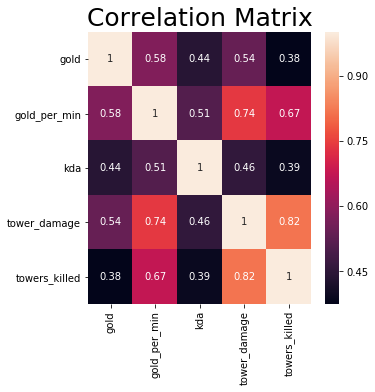

In [41]:
cols_to_use = ['gold', 'gold_per_min', 'kda', 'tower_damage', 'towers_killed']
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
import seaborn as sns
sns.heatmap(df_my_match[cols_to_use].corr(), annot = True)
plt.title("Correlation Matrix", size = 25)

The correlation matrix shows that:
- gold_per_min is highly correlated with tower_damage
- tower_damage is highly correlated with towers_killed and gold_per_min
- towers_killed is highly correlated with tower_damage

In Dota2, killing a tower gives a player and their teammates a certain amount of gold. Thus, increase tower_damage results in an increase gold_per_min. Moreover, in order to destroy a tower, a player has to deal a certain amount of damage to the tower. Therefore, tower_damage also results in towers_killed. As a result, I'll focus on investigating tower_damage instead of the other two features. Since the feature 'gold' shows the total amount of gold a player has at the end of the game, even though it is not highly correlated with any single feature, it is correlated with all features. Thus, it should not be taken into consideration in my analysis. I will eliminate it.

In conclusion, the featurres I'll investigate is kda, tower_damage.

### Negative correlation

And the top 5 negative correlations are:
- abandons              **-0.058569**
- sentry_uses           **-0.090196**
- leaver_status         **-0.108370**
- buyback_count         **-0.317446**
- life_state_dead       **-0.403315**
- deaths                **-0.430504**

Some of the features in these aforementioned features lhave a lot of missing values (above 90% of the data is missing). Those are sentry_uses, leaver_status, buy_back_count, life_state_dead. As a result, the two variables I'll investigate are kda and deaths. Let's take a look at their correlations.

In [43]:
df_my_match['kda'].corr(df_my_match['deaths'])

-0.5993185975626274

Accordingly, they have a pretty high negative correlation. In fact, kda means kills/deaths/assists. Consequently, kda is  made up of deaths. Therefore, intead of investigating kda and deaths. I would investigate deaths, kills and assists separately. As a result, the features that I will investigate are abandons, deaths, kills and assists.

### Abandons and Winning Chance
Since  Dota2 is a 5v5 game, the features in a game was designed so that the game would be optimally played when there's 5 players in a team. Thus, it's understandable that if one or a few of the players in a team abandons the game, that team is subject to a much higher chance of losing the game. As a result, it has long been known among players that an abandonment in their opponents' team means an absolute win for them. Let's check if this is true for my games

In [24]:
### Count the number of abandons in my games. 1 means yes, 0 means no abandons.
df['abandons'].value_counts()

0    29263
1      207
Name: abandons, dtype: int64

Rhere are ten individual players in a match and our dataset shows data for each individual player. Therefore, there might have been multiple abandons in the same game. Let's double check our results.

In [25]:
### The code below will group the rows that have an abandonment and the same match_ids together 
### and calculate how many similar match_ids there are.
df[df['abandons']==1].groupby('match_id').match_id.count()

match_id
424045036     1
427247312     1
427419152     1
431379283     1
442990722     1
463721090     1
467992569     1
474424219     1
478574131     1
478635885     1
495486143     1
497219997     1
497655278     1
499651349     1
508440003     1
509314371     1
510965713     1
512926750     1
531691252     1
542529652     1
546239821     1
547713404     1
548915848     1
551590460     1
557435974     1
574727841     1
657767060     1
771120484     1
788085201     1
798000906     1
             ..
3132623878    1
3135007591    1
3143125957    1
3154000996    1
3160124418    1
3162240627    1
3168582035    1
3172615777    1
3175102364    1
3191818128    1
3196655285    1
3301344883    1
3311415629    1
3329912595    1
3496748055    1
3762307882    1
3765255560    1
3766385616    1
3772161298    1
3776185357    1
3780124744    1
3792364019    1
3792906312    1
3798186919    1
3798796921    1
3806671746    1
3823793556    1
3829148049    1
3835322526    1
3839002847    1
Name: match_id,

Accordingly, there are 207 matches with an abandonment each. This means that for the 207 matches with abandons in my match history, there is only 1 abandon for each. Now let's check how many of losses these abandonments result in.
    

In [26]:
### Count the number of wins when there is an abandon. 0 means loss while 1 means win.
df[df['abandons']==1].groupby('win').win.count()

win
0    168
1     39
Name: win, dtype: int64

So these abandonments result in 168 losses while only bring about 39 wins. This corresponds to a 81% losing rate for matches with abandonment. This is a significant factor in determining the result of the match even though it doesn't happen often as there are only 207 cases out of 2947 matches. 

### Tower Damage and Winning Chance
In order to win a dota2 match, each team has to destroy the throne of the other team. Before reaching the throne, each team has to destroy layers of towers, however. Therefore, a predictor of winning is the total damage done to towers by each team. 

Text(0.5,1,'Losing Matches')

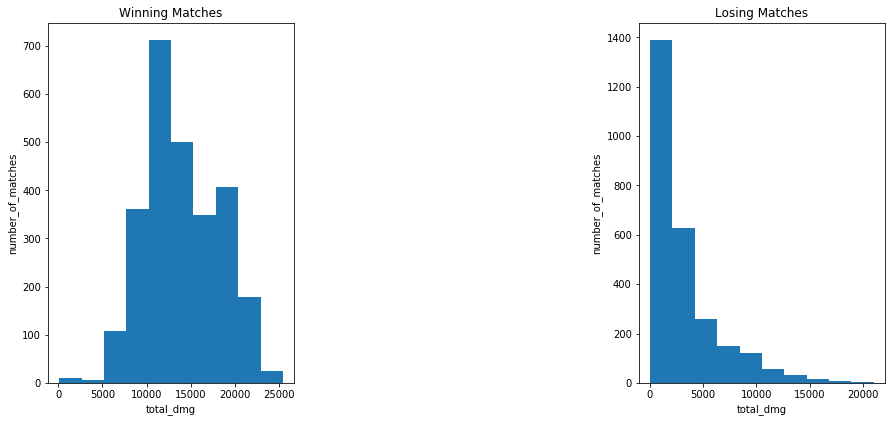

In [27]:
### Plotting the distribution of tower damage for winning matches
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
df[df['win']==1].groupby('match_id')['tower_damage'].sum().dropna().plot.hist()
plt.xlabel('total_dmg')
plt.ylabel('number_of_matches')
plt.title('Winning Matches')
### Plotting the distribution of tower damage for losing matches
plt.subplot(1,3,3)
plt.subplots_adjust(top=6,bottom=5)
df[df['win']==0].groupby('match_id')['tower_damage'].sum().dropna().plot.hist()
plt.xlabel('total_dmg')
plt.ylabel('number_of_matches')
plt.title('Losing Matches')

The plot on the left plots the number of winning matches vs total_damage dealt to towers by the winning team for each match. On the other hand, the plot on the right plots the number of losing matches vs total_damage dealt to towers by the losing team for each match. There's a clear trend on the right. As the total_damage increases, the number of losing matches decreases. The number of winning matches also increases as the total_damage increases. However, the number of winnning matches starts to decrease once the total_damage passes a certain point. These plots show that total_damage dealt to towers do play a major role in determining the winning probability. However, there is an optimal point for the total_damage variable. Once this point is reached, further damage dealt to towers may not significantly increase the chance of winning. Given that towers do get healed up over time, the fact that more damage than the optimal point is done means that the towers are not destroyed over time. This signifies a highly contested game whenever the total_damage dealt to towers surpasses the optimal point.

### Hero Damage and Winning Chance
Since each team has to fight for resources and to get objectives, total damage dealt to heroes can also contribute to the winning probability of the game. Let's take a look.

Text(0.5,1,'losing matches')

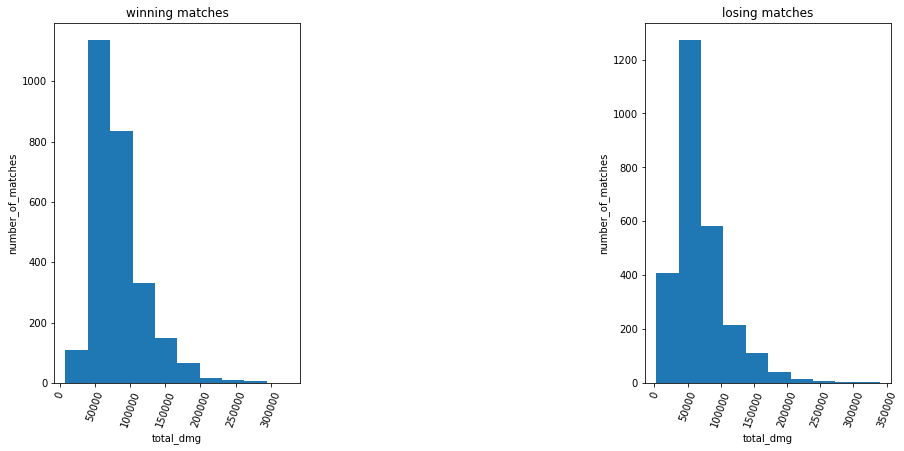

In [28]:
### Graph the distribution of the total hero damage in winning matches
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
df[df['win']==1].groupby('match_id')['hero_damage'].sum().dropna().plot.hist()
plt.xlabel('total_dmg')
plt.ylabel('number_of_matches')
plt.xticks(rotation=70)
plt.title('winning matches')
### Graph the distribution of the total hero damage in losing matches
plt.subplot(1,3,3)
plt.subplots_adjust(top=6,bottom=5)
df[df['win']==0].groupby('match_id')['hero_damage'].sum().dropna().plot.hist()
plt.xlabel('total_dmg')
plt.xticks(rotation=70)
plt.ylabel('number_of_matches')
plt.title('losing matches')

These two graphs look almost identical. The graph shows that total damage dealt to heroes is not a good predictor of winning.

### Radiant and Winning Chance
It has long been hypothesized by the Dota2 community that being on the Radiant size is more advantagous than being on the Dire side. Let's see if this is true.

For this investigation, I will use only my match data since it is more convenient and won't change the nature of the investigation. Because Dota2 is constantly updated and renewed, being on the Radiant side in this patch might mean different thing from being on the Radiant side in a later patch. In my opinion, being on the Radiant team is more advantageous only when the win rate is more than 60%. Thus, I will investigate the win rate for the Radiant team in my match across patches. 

26
2
8
15


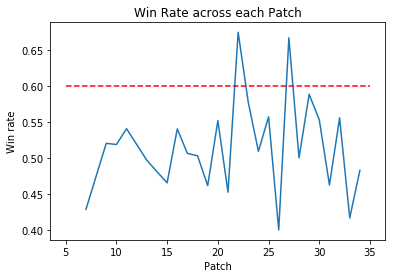

In [29]:
### get the total number of wins for each patch
df_radiant_win = df_my_match[df_my_match['radiant_win']==1]['patch'].dropna().value_counts().sort_index()
### get the total number of matches for each patch
df_patch = df_my_match['patch'].dropna().value_counts().sort_index()
### calculate the proportion of wins in each patch and save it to variable Patch_win_rate
Patch_win_rate = (df_radiant_win / df_patch)
### print the total number of patches and total number of patches where the rate of winning is more than 60% on the Radiant side
print(len(Patch_win_rate))
print(len(Patch_win_rate[Patch_win_rate > 0.6]))
print(len(Patch_win_rate[Patch_win_rate > 0.55]))
### print the toal number of patches with more than 50% win rate for the Radiant side
print(len(Patch_win_rate[Patch_win_rate > 0.5]))

### Plot the winrate against the patches
plt.plot(Patch_win_rate.index, Patch_win_rate)
plt.xlabel('Patch')
plt.ylabel('Win rate')
plt.title("Win Rate across each Patch")
threshold = 0.6


# horizontal line indicating the threshold which  is 0.6
plt.plot([5, 35], [threshold, threshold], "r--")


The total number of patches are 26. Of the 26 patches, only in 2 of them, the Radiant side has more than 60% percent win rate. Only 8 out of 26 have a win rate bigger than 55% for the Radiant side. And there are 15 patches with win rate more than 50% for the Radiant side. The numbers as well as the graph show that being on the Radiant side does not give clear advantage across patches. 

### Kills/ Deaths/ Assists (KDA) and Winning Chance
Since Dota2 is a strategic combat game, each team will have to involve in fighting. The better a team is, the better the figures related to KDA will be. For example, if a team is winning, they will generally have more kills, less deaths and more assists. Thus, KDA can be a good predictor of winning probabilities for a team. Let's investigate kills, deaths and assists seperately.

#### Kills and Winning Chance

In [30]:
### Print out the mean and median kills for a win match
print( 'Mean kill in a win match:', df[df['win'] ==1]['kills'].mean(),', ' 
      'Median kill in a win match:', df[df['win'] ==1]['kills'].median())
### Print out the interquartile range kills for a win match
print('The interquartile range kill for a win match: ',
      df[df['win'] ==1]['kills'].quantile(0.75) - df[df['win'] ==1]['kills'].quantile(0.25))
print('---'*20)
### Print out the mean and median kills for a loss match
print('Mean kill in a loss match:', df[df['win'] ==0]['kills'].mean(),', ' 
      'Median kill in a loss match:', df[df['win'] ==0]['kills'].median())
### Print out the interquartile range kills for a loss match
print('The interquartile range kill for a loss match: ',
      df[df['win'] ==0]['kills'].quantile(0.75) - df[df['win'] ==0]['kills'].quantile(0.25))


Mean kill in a win match: 8.299898201560909 , Median kill in a win match: 7.0
The interquartile range kill for a win match:  7.0
------------------------------------------------------------
Mean kill in a loss match: 5.44411265693926 , Median kill in a loss match: 5.0
The interquartile range kill for a loss match:  6.0


[Text(0,0.5,'number of kills'), Text(0.5,0,'')]

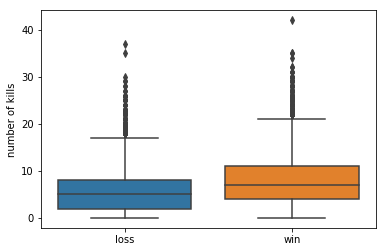

In [31]:
### Graph a boxplot graph of the distribution of the number of kills in win and loss matches
g = sns.boxplot(x = 'win', y='kills', data = df )
g.set(xticklabels= ['loss', 'win'])
g.set(xlabel = '', ylabel = 'number of kills')

The graph shows that the total number of kills in a match for the winning team is generally greater than that of the losing team. In particular, the mean kill for a winning team is approximately 8.3 while that of the losing team is about 5.4. The median is 7.0 and 5.0, respectively. While the interquartile range is 7.0 and 6.0, respectively. Therefore, kills is a good predictor for winning probability.

#### Deaths and winning chance

In [32]:
### Print out the mean and median deaths for a win match
print( 'Mean deaths in a win match:', df[df['win'] ==1]['deaths'].mean(),', ' 
      'Median deaths in a win match:', df[df['win'] ==1]['deaths'].median())
### Print out the interquartile range deaths for a win match
print('The interquartile range deaths for a win match: ',
      df[df['win'] ==1]['deaths'].quantile(0.75) - df[df['win'] ==1]['deaths'].quantile(0.25))
print('---' * 20)
### Print out the mean and median deaths for a loss match
print('Mean deaths in a loss match:', df[df['win'] ==0]['deaths'].mean(),', ' 
      'Median deaths in a loss match:', df[df['win'] ==0]['deaths'].median())
### Print out the interquartile range deaths for a loss match
print('The interquartile range deaths for a loss match: ',
      df[df['win'] ==0]['deaths'].quantile(0.75) - df[df['win'] ==0]['deaths'].quantile(0.25))

Mean deaths in a win match: 5.706277570410587 , Median deaths in a win match: 5.0
The interquartile range deaths for a win match:  5.0
------------------------------------------------------------
Mean deaths in a loss match: 8.525755005089922 , Median deaths in a loss match: 8.0
The interquartile range deaths for a loss match:  5.0


[Text(0,0.5,'number of deaths'), Text(0.5,0,'')]

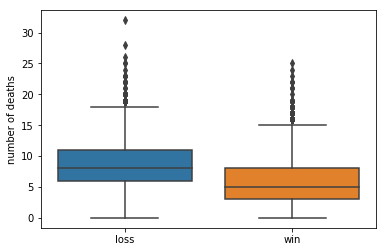

In [33]:
### Graph a boxplot graph of the distribution of the number of deaths in win and loss matches
g = sns.boxplot(x = 'win', y='deaths', data = df )
g.set(xticklabels= ['loss', 'win'])
g.set(xlabel = '', ylabel = 'number of deaths')

The trend is reverse this time which makes sense. The losing team will often suffer more, thus, receiving more deaths on their side. On the other hand, the winning team will receive less deaths. The mean and median for the losing team are 8.53 and 8.0, respectively. While those for the winning team are 5.7 and 5.0, respectively. The interquartile range is, however, similar. 

#### Assists and Winning chance

In [34]:
### Print out the mean and median assists for a win match
print( 'Mean assists in a win match:', df[df['win'] ==1]['assists'].mean(),', ' 
      'Median assists in a win match:', df[df['win'] ==1]['assists'].median())
### Print out the interquartile range assists for a win match
print('The interquartile range for a win match: ',
      df[df['win'] ==1]['assists'].quantile(0.75) - df[df['win'] ==1]['assists'].quantile(0.25))
print('---' * 20)
### Print out the mean and median assists for a loss match
print('Mean assists in a loss match:', df[df['win'] ==0]['assists'].mean(),', ' 
      'Median assists in a loss match:', df[df['win'] ==0]['assists'].median())
### Print out the interquartile range assists for a loss match
print('The interquartile range assists for a loss match: ',
      df[df['win'] ==0]['assists'].quantile(0.75) - df[df['win'] ==0]['assists'].quantile(0.25))

Mean assists in a win match: 14.824974550390227 , Median assists in a win match: 14.0
The interquartile range for a win match:  9.0
------------------------------------------------------------
Mean assists in a loss match: 9.815473362741772 , Median assists in a loss match: 9.0
The interquartile range assists for a loss match:  8.0


[Text(0,0.5,'number of deaths'), Text(0.5,0,'')]

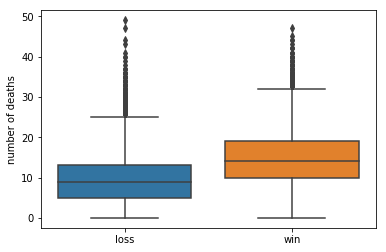

In [35]:
### Graph a boxplot graph of the distribution of the number of assists in win and loss matches
g = sns.boxplot(x = 'win', y='assists', data = df )
g.set(xticklabels= ['loss', 'win'])
g.set(xlabel = '', ylabel = 'number of deaths')

The graph also displays a trend that a winning team will usually have more assists in a game than the losing team. The mean and median for the losing and winning team are 9.8, 9.0 , 14.8, 14.0, respectively. The graph, however, shows one interesting thing. The outlier in the losing team is greater than that of the winning team. This shows that, sometimes, in a match, players in a losing team have more assists than those of the winning team. This implies that support roles(those who generally don't get the kills but assists instead) don't determine the final outcome of the match. 

### Conclusion
- ** the findings show that abandons, tower_damage and kda play a big role in determining the winning probability of the match. **
- ** Being on the radiant side does not give a clear advantage across patches.**
- ** hero_damage is not a good predictor of winning. **

### Moving forward
- ** There are some other potential featurres that could contribute to winning chances such as last_hits, denies.  In the future I would like to see how they contribute to a predictive model. **
- ** The next step for my analysis is to build a predictive model based on the features that I have done the analysis on.**